In [1]:
import numpy as np

## 0. Calculer les temps d'exécution (bases)

Il suffit de récupérer le temps d'exécution avant et après le code qu'on veut évaluer, en utilisant time.time().

Voir https://docs.python.org/fr/3/library/time.html pour plus de détails.

In [45]:
import time 
N = 1_000_000
x = 0

start = time.time()
for k in range(N):
    x += 1
executionTime = time.time() - start  # en secondes
print ("Execution time : %.4f seconds" %executionTime)

Execution time : 0.0577 seconds


### Pour calculer le temps d'exécution d'une ligne de code : timeit

In [ ]:
import timeit

N = 1_000_000
l1 = [random() for i in range(N)]
l2 = [random() for i in range(N)]
%timeit s = sum(map(truediv, l1, l2))

a1 = np.array(l1)
a2 = np.array(l2)
%timeit s = np.sum(a1/a2)

## 1. Afficher des figures (bases)

In [17]:
# Affichage des graphiques avec Matplotlib
import matplotlib.pyplot as plt

Décommenter la ligne ci-dessous qui commence par `%` pour choisir le type d'affichage de figures:

- `%matplotlib inline` Version par défaut : figures en sortie de console
- `%matplotlib notebook` Version interactive *(exclusif à jupyter notebook)*
- `%matplotlib tk` Version interactive dans une fenêtre à part *(fonctionne mieux pour les animations que "notebook" ?)*

In [18]:
# basic backend, shows an image, no interaction
# %matplotlib inline 

# interactive display of graphs inside Jupyter Notebooks
%matplotlib notebook 

# interactive plots that opens a new window outside of the notebook
# %matplotlib tk  

<IPython.core.display.Javascript object>


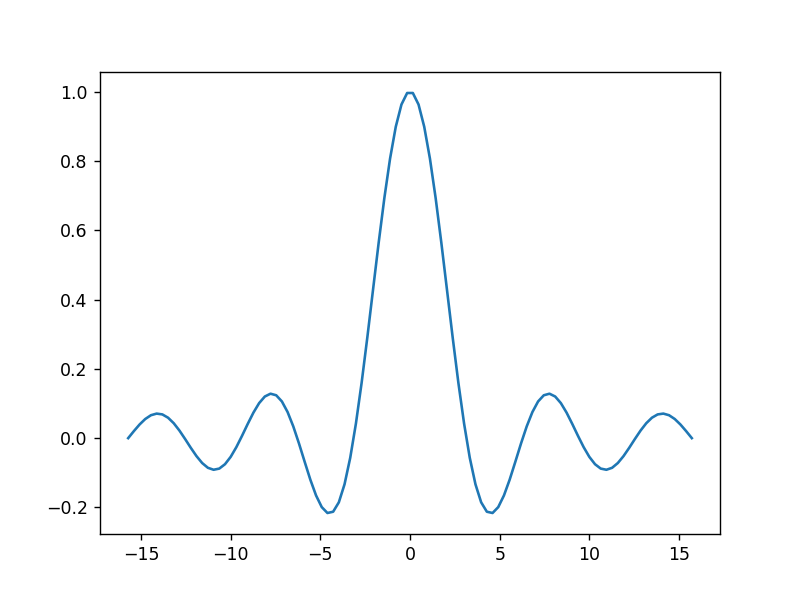

In [19]:
x = np.linspace(- 5*np.pi, 5*np.pi, 100)

# Créer une figure
plt.figure()

# Tracé en abscisse (1er paramètre) et en ordonnée (2ème paramètre) dans la dernière figure appelée
plt.plot(x, np.sin(x) / x);

### Sous-figures

<IPython.core.display.Javascript object>


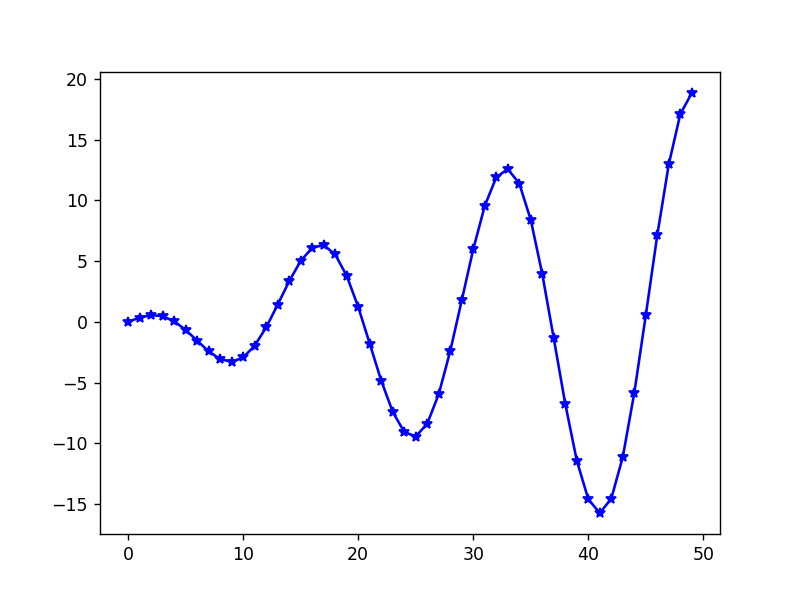

<IPython.core.display.Javascript object>


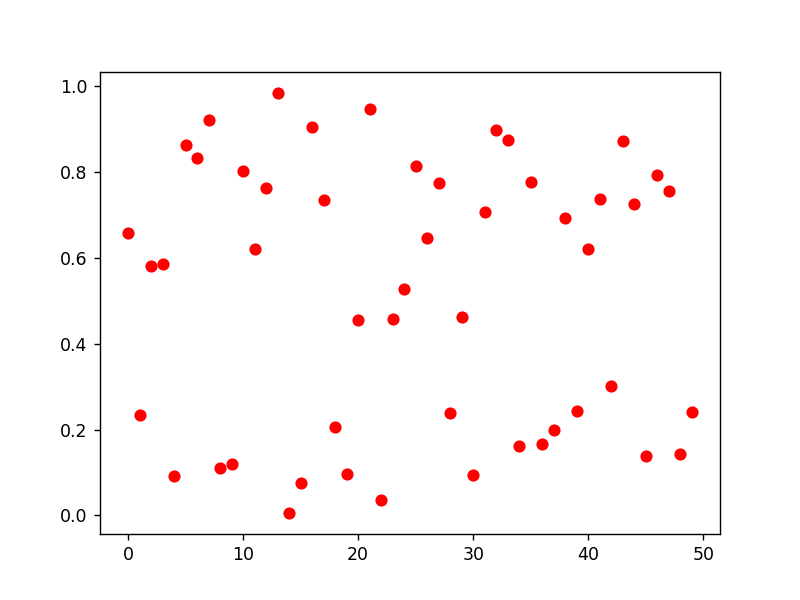

In [20]:
theta = np.linspace(0, 6*np.pi, 50) # 50 steps from 0 to 6 PI
z = np.random.rand(50)              # array with 50 random values in [0,1]
x = theta * np.cos(theta)

# Première méthode (la plus rapide) -----
plt.figure() 
plt.plot(x, 'b-*')
plt.figure()
plt.plot(z,'ro');

plt.show()   # permet d'afficher la figure au moment voulu

<IPython.core.display.Javascript object>


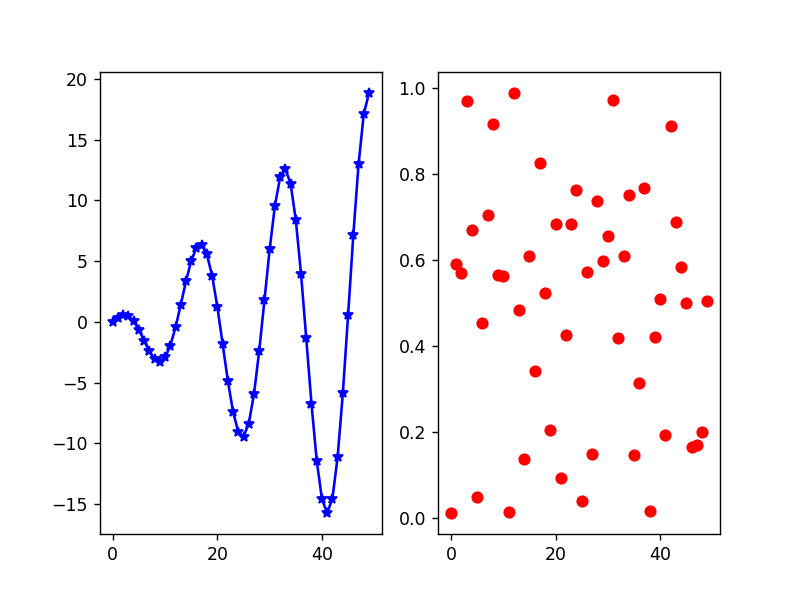

In [4]:
# Deuxième méthode pour tout mettre dans une figure à la main -----
plt.figure()
plt.subplot(1, 2, 1) # en tout une ligne et 2 colonnes, tracé numéroté 1 
plt.plot(x, 'b-*')
plt.subplot(1, 2, 2) # en tout une ligne et 2 colonnes, tracé numéroté 2
plt.plot(z, 'ro')
plt.show()

<IPython.core.display.Javascript object>


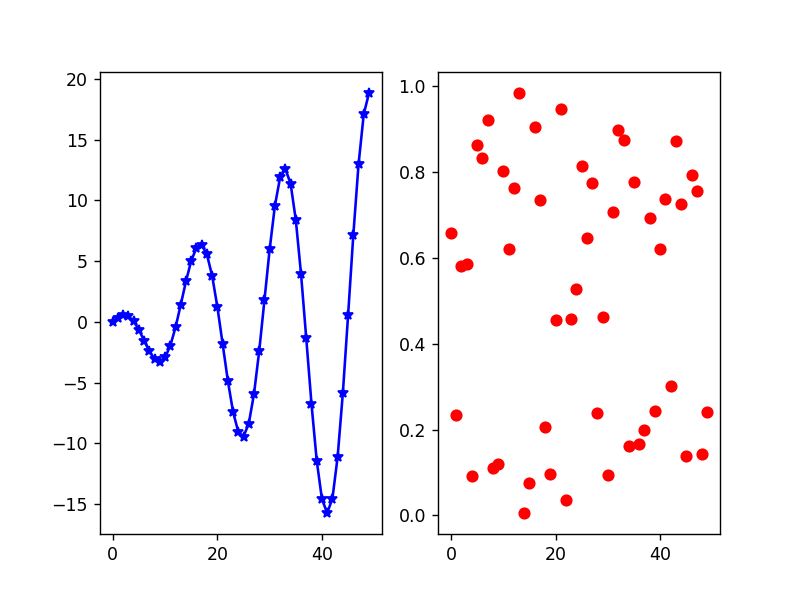

In [21]:
# Meilleure méthode pour n'importe quel nombre de sous figures -----

fig, axes = plt.subplots(1, 2, num=10) # nb de lignes, nb de colonnes, numéro de la figure quelconque
axes[0].plot(x, 'b-*')
axes[1].plot(z, 'ro')
axes.grid()
fig.show()

### Utilisation de fig, axes (détaillée)

In [ ]:
# WIP

### Types de tracés 

In [ ]:
x = np.linspace(0, 0.9, 30)
y = np.sqrt(1 - x**2)  # y := f(x)
dy = - x / np.sqrt(1 - x**2)  # dérivées f'(x) 

Par défaut, `plt.plot()` trace des lignes entre des points

In [ ]:
plt.figure()
plt.plot(x, y)
plt.show()

`Scatter` pour tracer des points

In [ ]:
plt.figure()
plt.scatter(x, y) # In that case, plot may be faster !
plt.show()

`Quiver` pour tracer des flèches, ou des portraits de phase (cellules suivantes)

Cf https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html

In [ ]:
plt.figure()
plt.quiver(x, y, x, dy)
plt.show()

`np.meshgrid(x,y)` renvoie des couples `u=`$[(x_1, y_1), ..., (x_n, y_1)]$, `v=`$[(x_n, y_1), ... (x_n, y_n)]$.

Cf https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

<IPython.core.display.Javascript object>


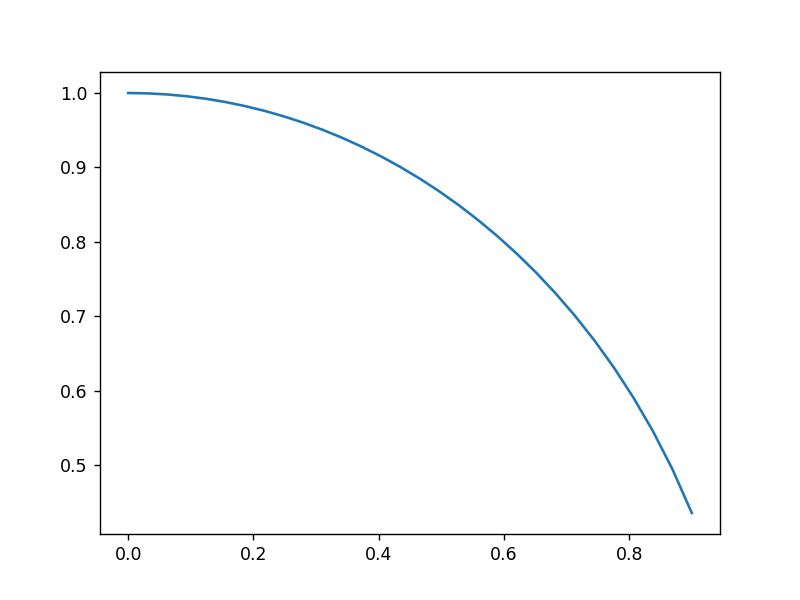

<IPython.core.display.Javascript object>


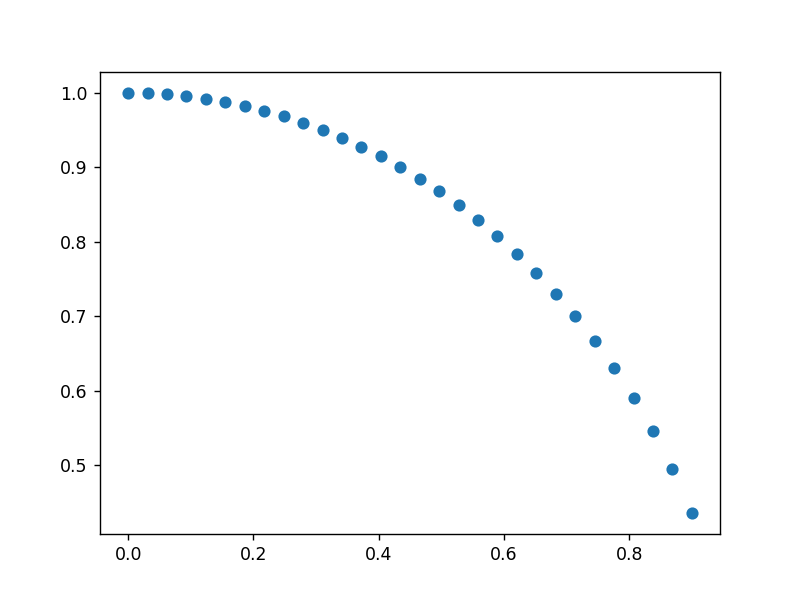

<IPython.core.display.Javascript object>


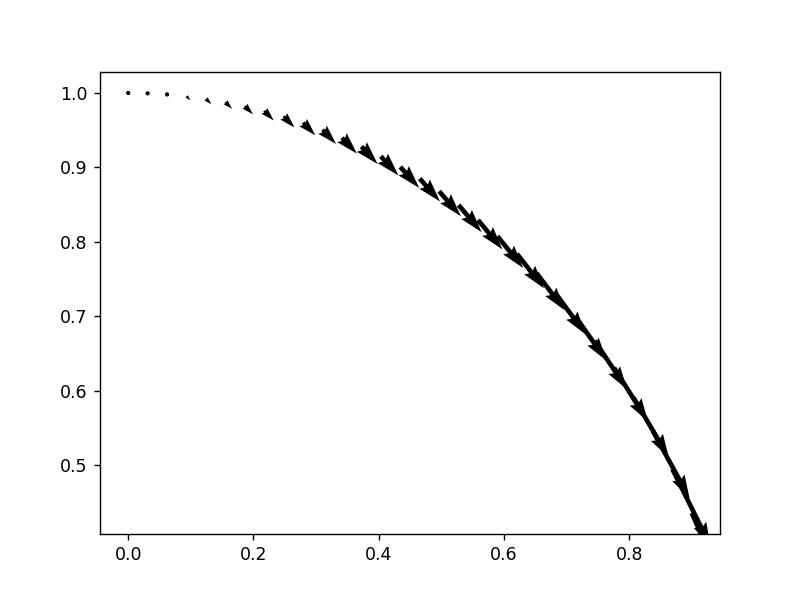

<IPython.core.display.Javascript object>


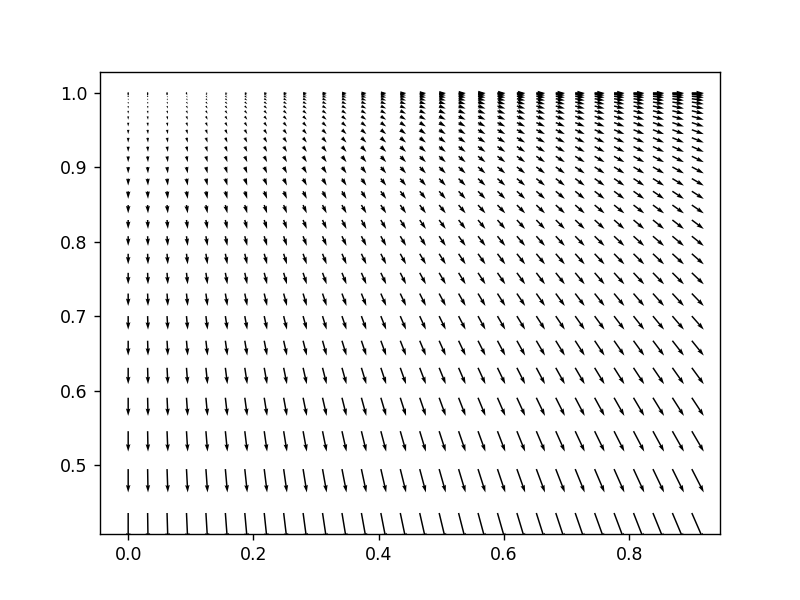

In [49]:
u, v = np.meshgrid(x, y)
w, t = np.meshgrid(x, dy)
plt.figure()
plt.quiver(u, v, w, t)
plt.show()

## 2. Personnalisation des tracés

In [ ]:
# red, dot-dash, triangles and blue, dot-dash, bullet
plt.figure()
plt.plot(x, np.sin(x)/x, 'r-^', x, np.sin(2*x)/x, 'b-o');
plt.show()    # Show the figure. Without it, you won't see anything

### Légendes, titres et labels

In [ ]:
theta = np.linspace(0, 4*np.pi, 200);

<IPython.core.display.Javascript object>


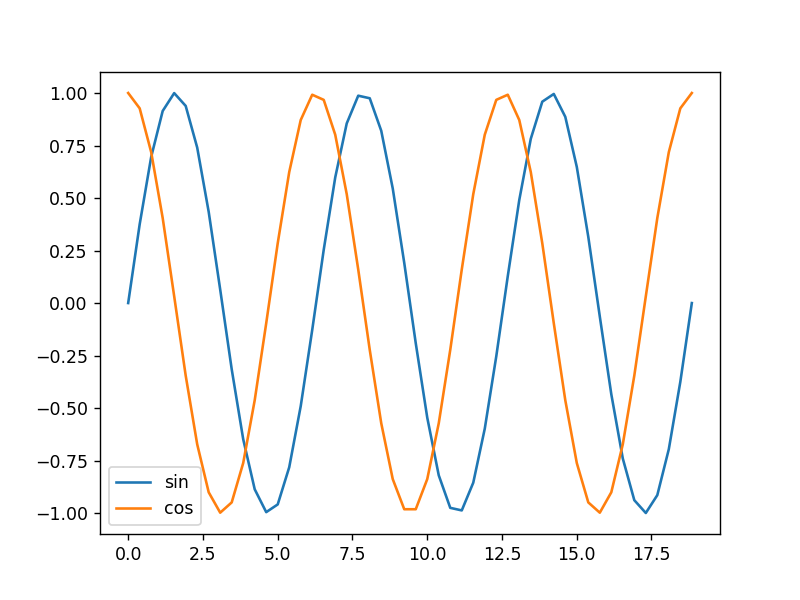

In [33]:
# Etiquetage tracé par tracé
plt.figure()
plt.plot(theta, np.sin(theta), label='sin')
plt.plot(theta, np.cos(theta), label='cos')
plt.legend();

<IPython.core.display.Javascript object>


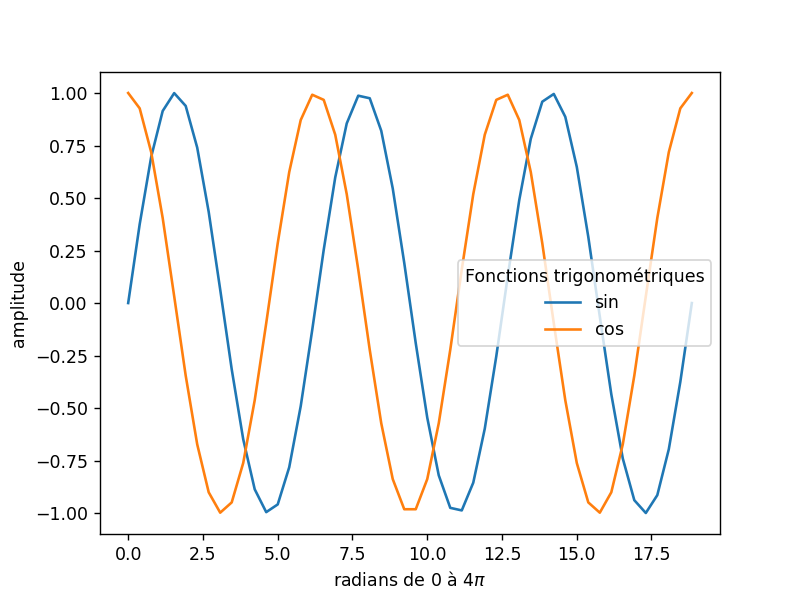

In [32]:
# Etiquetage commun 
plt.figure()
plt.plot(theta, np.sin(theta))
plt.plot(theta, np.cos(theta))
plt.xlabel('radians de 0 à $4\pi$')
plt.ylabel('amplitude')
plt.legend(['sin', '$\cos$'], title='Fonctions trigonométriques'); #On peut écrire en LaTeX !!

<IPython.core.display.Javascript object>


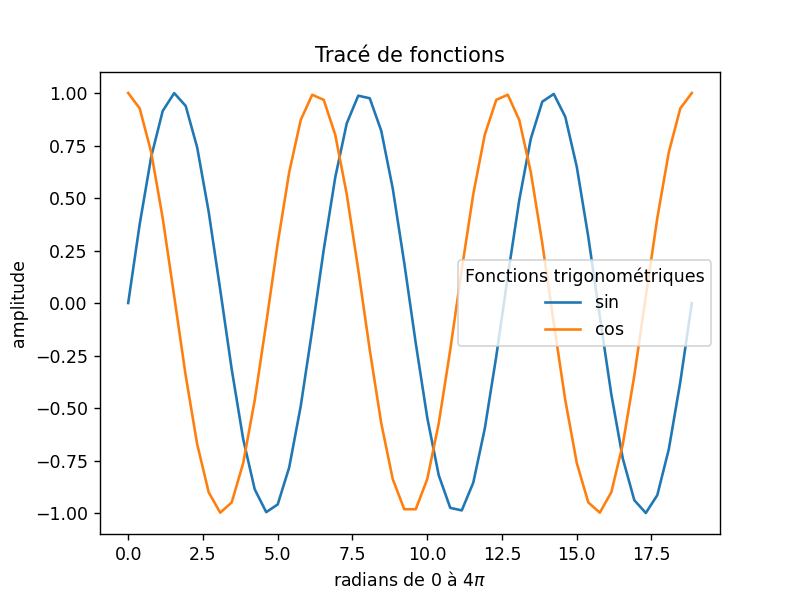

In [34]:
# Etiquetage en utilisant fig, axes
fig, ax = plt.subplots(1, 1)
ax.plot(theta, np.sin(theta), label='$\sin$')
ax.plot(theta, np.cos(theta), label='$\cos$')
ax.set_xlabel('radians de 0 à $4\pi$')
ax.set_ylabel('amplitude')
ax.set_title('Tracé de fonctions')
ax.legend(title='Fonctions trigonométriques');

## 3. Sauvegarder des figures, formattages particuliers

### Sauvegarder des figures

<IPython.core.display.Javascript object>


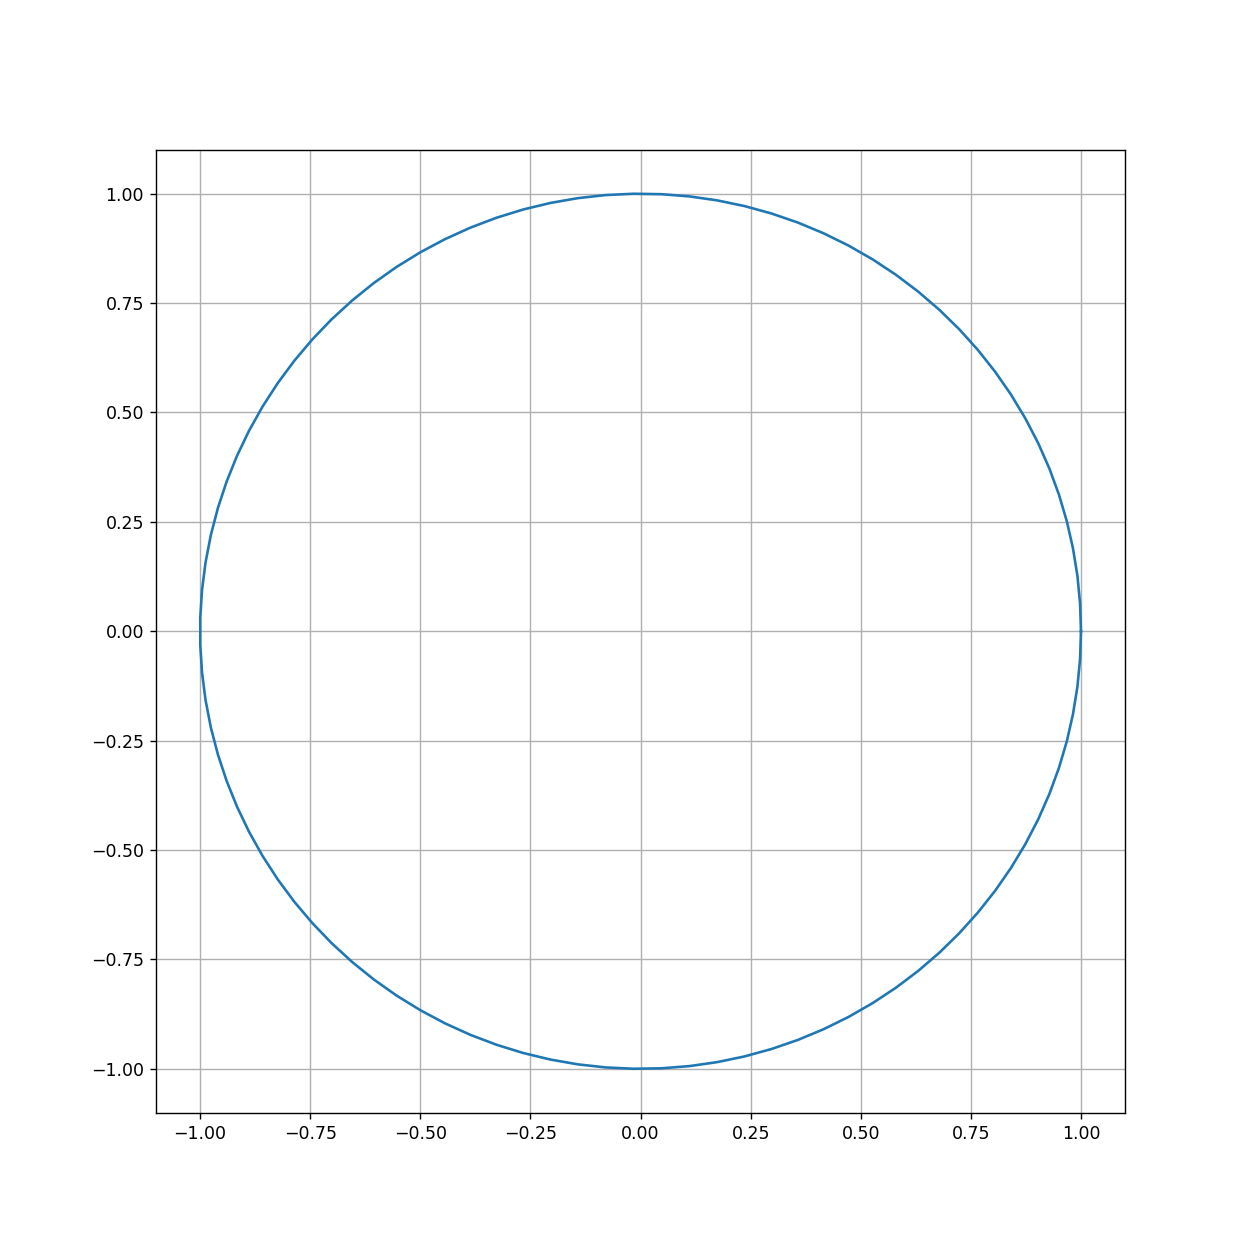

In [40]:
theta = np.linspace(0, 2*np.pi, 100)
plt.figure(figsize=(10, 10))  # pour préciser la taille
plt.plot(np.cos(theta), np.sin(theta))
plt.grid()  # Pour afficher une grille !

plt.savefig('circle.png'); 
plt.savefig('../Test/circle.svg');  # chemin relatif  
plt.savefig('circle.pdf', bbox_inches='tight');  # bbox_inches='tight' pour ne pas avoir d'espace sur les bords

### Echelles logarithmiques

In [ ]:
t = np.arange(0.01, 20.0, 0.01)

plt.figure()

plt.subplot(221) 
plt.semilogy(t, np.exp(-t/5.0))
plt.title('semilogy')
plt.grid(True)

plt.subplot(222, fc='y') 
plt.semilogx(t, np.sin(2*np.pi*t))
plt.title('semilogx')
plt.grid(True)

plt.subplot(223) 
plt.semilogx(t, np.exp(-t/5.0))
plt.title('semilogx exp')
plt.grid(True)

plt.subplot(224, fc='y') 
plt.semilogy(t, np.sin(2*np.pi*t))
plt.title('semilogy sin')
plt.grid(True)

### Barres d'erreur

Cf https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html

In [ ]:
N = 25
f = lambda x: np.sin(x)
x = np.random.uniform(0, 10, (N))
dy = np.abs(0.25*np.random.randn(N))
y = f(x) + np.random.uniform(0, dy, (N))

plt.figure()
plt.errorbar(x, y, yerr=dy, fmt='.')

xx = np.linspace(0, 10, 101)
plt.plot(xx, f(xx), alpha=0.25)
plt.show()

### Courbes de niveau

In [ ]:
x = y = np.arange(-2.0*np.pi, 2.0*np.pi + 0.01, 0.01)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

plt.figure()
plt.contour(X, Y, Z);

## 4. Figures en 3D

Utilisation de la librairie `mplot3d`: https://matplotlib.org/mpl_toolkits/mplot3d/index.html

### Courbes paramétriques
See https://matplotlib.org/tutorials/toolkits/mplot3d.html#line-plots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

N = 201
f = 5
t = np.linspace(0, 1, 101)
z = -t**3
x = t * np.cos(2*np.pi * f * t)
y = t * np.sin(2*np.pi * f * t)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z);

### Afficher des surfaces
See https://matplotlib.org/tutorials/toolkits/mplot3d.html#surface-plots

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

N = 101
X, Y = np.meshgrid(np.linspace(-1, 1, N), np.linspace(-1, 1, N))
sqr_dist = X**2 + Y**2
Z = np.cos(2*np.pi * sqr_dist) * np.exp(-4*sqr_dist)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm);
#ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, rstride=1, cstride=1); # Disable subsampling of the data